# Ритейл — Анализ программы лояльности

Менеджерами была поставлена следующая задача: оценить существующую программы лояльности.

Проанализируйте программу лояльности магазина.

- Проведите исследовательский анализ данных;
- Проведите анализ программы лояльности;
- Сформулируйте и проверьте статистические гипотезы.

## Материалы
* [Презентация](https://yadi.sk/d/o2R2QONe9Kc-qA)

## План выполнения работ
### [Шаг 1. Загрузка данных и изучение общей информации](#step1)
### [Шаг 2. Предобработка данных](#step2)
- ####  [Шаг 2.1. Приведение столбцов датафреймов к нижнему регистру](#step21) 
- ####  [Шаг 2.2. Исследовать соответствие типов](#step22)
- ####  [Шаг 2.3. Исследовать дубликаты](#step23)
- ####  [Шаг 2.4. Исследовать пропущенные значения](#step24)

### [Шаг 3. Исследовательский анализ данных](#step3)
- ####  [Шаг 3.1. Диаграмма количества покупателей по магазинам по дням](#step31)
- ####  [Шаг 3.2. Диаграмма соотношение количества покупок по различным магазинам по месяцам/дням](#step32)
- ####  [Шаг 3.3. Распределение количества товаров по магазинам](#step33)
- ####  [Шаг 3.4. Распределение количества покупок в корзине по магазинам по месяцам/дням](#step34)
- ####  [Шаг 3.5. Распределение выручки по магазинам по месяцам/дням](#step35)
- ####  [Шаг 3.6. Отношение количества участников программы лояльности к общему количеству клиентов по магазинам](#step36)
- ####  [Шаг 3.7. Распределение количества товаров лояльных и нелояльных пользователей по месяцам](#step37)
- ####  [Шаг 3.8. Распределение выручки лояльных и нелояльных клиентов по месяцам](#step38)
- ####  [Шаг 3.9. Стандартное отклонение и дисперсия корзины для лояльных и нелояльных клиентов за весь период](#step39)

### [Шаг 4. Проверка гипотез](#step4)
- #### [Гипотеза 1. Среднее количество товаров в корзине у участников программы лояльности и "рядовых" клиентов отличается](#step41)
 
- #### [Гипотеза 2. Средняя выручка участника программы лояльности и пользователя, который не входит в прогрумму лояльности различаются](#step42)

### [Шаг 5. Общий вывод ](#step5)


## <a id="step1"> Шаг 1. Загрузка данных и изучение общей информации</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sns
from scipy import stats as st
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

#### Прочитаем методом read_csv файлы 

In [2]:
url_1 = 'https://github.com/vovandrex/Praktikum/blob/master/product_codes.csv?raw=true'
url_2 = 'https://github.com/vovandrex/Praktikum/blob/master/retail_dataset.csv?raw=true'
product_codes = pd.read_csv(url_1,index_col=0)
retail_dataset = pd.read_csv(url_2,index_col=0)

In [3]:
def gen_info(data):
    print('\nРассмотрим общую информацию')
    data.info()
    print('\nВыведем 5 строк DataFrame на экран')
    display(data.head())
    print('\nРассмотрим описательную статистику нашего DataFrame')
    display(data.describe(include='all'))


In [4]:
gen_info(product_codes)


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 85123A to 20738
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_per_one  9969 non-null   float64
dtypes: float64(1)
memory usage: 155.8+ KB

Выведем 5 строк DataFrame на экран


,price_per_one
productID,
85123A,2.55
71053,3.39
84406B,2.75
84029G,3.39
84029E,3.39



Рассмотрим описательную статистику нашего DataFrame


,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


#### Описание данных product_codes
- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;


In [5]:
gen_info(retail_dataset)


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
Index: 105335 entries, 538280 to 543977
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_ID          105335 non-null  object 
 1   Quantity         105335 non-null  int64  
 2   purchasedate     105335 non-null  object 
 3   CustomerID       69125 non-null   float64
 4   ShopID           105335 non-null  object 
 5   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.6+ MB

Выведем 5 строк DataFrame на экран


,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
purchaseid,,,,,,
538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0



Рассмотрим описательную статистику нашего DataFrame


,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
count,105335,105335.000000,105335,69125.000000,105335,105335.000000
unique,3159,NaN,4430,NaN,31,NaN
top,85123A,NaN,2016-12-06 16:57:00,NaN,Shop 0,NaN
freq,565,NaN,675,NaN,97393,NaN
mean,NaN,7.821218,NaN,21019.302047,NaN,0.226345
std,NaN,327.946695,NaN,1765.444679,NaN,0.418467
min,NaN,-74216.000000,NaN,18025.000000,NaN,0.000000
25%,NaN,0.000000,NaN,19544.000000,NaN,0.000000
50%,NaN,2.000000,NaN,20990.000000,NaN,0.000000
75%,NaN,7.000000,NaN,22659.000000,NaN,0.000000


#### Описание данных retail_dataset
- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

#### Вывод
Требуется привести названия столбцов к нижнему регистру.

Датафрем `retail_dataset`:
- Привести столбец `purchasedate` к формату даты;
- Обработать пропуска в столбце `CustomerID`
- Привести `loyalty_program` к целочисленным

Датафрем `product_codes`:
- переиндексировать строчки;
- обработать дубликаты

## <a id="step2"> Шаг 2. Предобработка данных</a>

In [6]:
# Переиндексируем строчки
product_codes = product_codes.reset_index()


##### <a id="step21"> Шаг 2.1. Приведение столбцов датафреймов к нижнему регистру</a>

In [7]:
retail_dataset.columns = retail_dataset.columns.str.lower()
product_codes.columns = product_codes.columns.str.lower()

##### <a id="step22"> Шаг 2.2. Исследовать соответствие типов</a>

In [8]:
# Приведем дату к формату даты и выделим день и месяц
retail_dataset['purchasedate'] = pd.to_datetime(retail_dataset['purchasedate'], 
                                                format='%Y-%m-%d %H:%M:%S')
retail_dataset['purchase_day'] = retail_dataset['purchasedate'].dt.date
retail_dataset['purchase_month'] = retail_dataset['purchasedate'].dt.month

# Приведем loyalty_program к целочисленным 
retail_dataset['loyalty_program'] = retail_dataset['loyalty_program'].astype('int64')


##### <a id="step23"> Шаг 2.3. Исследовать дубликаты</a>

In [9]:
# Рассмотрим количество уникальных товаров в таблице product_codes
print('Количество уникальных товаров в датафрейме product_codes: ',len(product_codes['productid'].unique()))
# Возьмем для товаров среднюю цену по магазинам 
product_codes_gr = product_codes.groupby('productid').mean().reset_index()
display(product_codes_gr.head())

Количество уникальных товаров в датафрейме product_codes:  3159


,productid,price_per_one
0,10002,1.38
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [10]:
# Рассмотрим дубликаты в датафрейме retail_dataset
print('Количество дубликатов в датафрейме retail_dataset: ',retail_dataset.duplicated().sum())
display(retail_dataset[retail_dataset.duplicated()].head())

Количество дубликатов в датафрейме retail_dataset:  1196


,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,purchase_day,purchase_month
purchaseid,,,,,,,,
537265,21499,24,2016-12-06 11:26:00,21598.0,Shop 0,0,2016-12-06,12
540803,21485,0,2017-01-11 12:30:00,20348.0,Shop 0,0,2017-01-11,1
540524,21326,11,2017-01-09 12:53:00,22414.0,Shop 0,1,2017-01-09,1
537192,22585,0,2016-12-05 13:42:00,22081.0,Shop 0,1,2016-12-05,12
539739,22414,0,2016-12-21 15:19:00,NaN,Shop 0,0,2016-12-21,12


In [11]:
retail_dataset = retail_dataset.drop_duplicates().reset_index()

##### <a id="step24"> Шаг 2.4. Исследовать пропущенные значения</a>

In [12]:
print('Количество пропусков в столбце customerid : ',
      retail_dataset[retail_dataset['customerid'].isna() == True].shape[0])

Количество пропусков в столбце customerid :  35988


Предположим, что пользователи, которые не имеют customerid являются неидентифицированными клиентами. Учитывая, что в большинстве случаев у нас 1 уникальный пользователь = 1 уникальный чек, заполним идентификатор значением с чека. 

In [13]:
# Проверим, есть ли среди пропусков участники программы лояльности
display(retail_dataset[(retail_dataset['customerid'].isna() == True) & (retail_dataset['loyalty_program']==1)])

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,purchase_day,purchase_month


In [14]:
retail_dataset['customerid'] = retail_dataset['customerid'].fillna('CLIENT_'+retail_dataset['purchaseid'])

#### Вывод
На данном шаге мы привели к значения столбцов к нужному формату, переиндексировали датафремы и привели к нижнему регистру названия столбцов для удоства работы. 

Также мы заполнили пропуска в столбце `CustomerID` по такой теории: 
Если у нас не получилось идентифицировать пользователя по какой-то причине и, как мы проверили,  клиент не является участником программы лояльности, то присваиваем этому неидентифицированному пользователю идентификатор чека. 

## <a id="step3"> Шаг 3. Исследовательский анализ данных</a>

#### Объединим 2 датафрема

In [15]:
data = retail_dataset.merge(product_codes_gr,how = 'left', left_on='item_id',right_on='productid')

In [16]:
# Рассмотрим получившиеся данные
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104139 entries, 0 to 104138
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104139 non-null  object        
 1   item_id          104139 non-null  object        
 2   quantity         104139 non-null  int64         
 3   purchasedate     104139 non-null  datetime64[ns]
 4   customerid       104139 non-null  object        
 5   shopid           104139 non-null  object        
 6   loyalty_program  104139 non-null  int64         
 7   purchase_day     104139 non-null  object        
 8   purchase_month   104139 non-null  int64         
 9   productid        104139 non-null  object        
 10  price_per_one    104139 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 9.5+ MB


None

In [17]:
# Рассмотрим количество товаров равное 0
display('Количество строк, где значение количества товара равно 0: ', data[data['quantity'] ==0].shape[0])
display(data.loc[data['quantity'] ==0]['shopid'].value_counts())

'Количество строк, где значение количества товара равно 0: '

32221

Shop 0     31901
Shop 1        78
Shop 8        50
Shop 4        47
Shop 18       40
Shop 14       37
Shop 6        33
Shop 3         9
Shop 12        8
Shop 10        7
Shop 22        2
Shop 16        2
Shop 20        2
Shop 11        2
Shop 19        1
Shop 7         1
Shop 5         1
Name: shopid, dtype: int64

In [18]:
display(data.loc[data['quantity'] ==0].groupby('loyalty_program').agg({'purchaseid':'nunique'}))

,purchaseid
loyalty_program,
0,1222
1,517


#### Вывод
Видим, что количество товаров равное 0 встречается во многих магазинах, причем таких строк в датафреме у нас 32221. Предположим, что данные товар участвовал в акции (Например: "1+1" или "подарок при покупке ..."). Также видим, что нулевые покупки встречаются как у клиентов программы лояльности, так и у обычных пользователей. 

In [19]:
# Рассмотрим количество товаров равное 0
print('Количество строк, где значение количества товара меньше 0: ', data[data['quantity'] < 0].shape[0])
display(data[data['quantity'] < 0].head())
display(data.loc[data['quantity'] < 0]['shopid'].value_counts())

Количество строк, где значение количества товара меньше 0:  2075


,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,purchase_day,purchase_month,productid,price_per_one
64,C539944,22776,-2,2016-12-23 11:38:00,20239,Shop 0,0,2016-12-23,12,22776,14.697500
109,C542910,20726,-2,2017-02-01 15:38:00,23190,Shop 0,1,2017-02-01,2,20726,3.065714
112,C542426,22418,-25,2017-01-28 09:32:00,19825,Shop 0,0,2017-01-28,1,22418,1.662500
253,C539726,22791,-11,2016-12-21 14:24:00,22686,Shop 0,1,2016-12-21,12,22791,1.820000
344,C544034,21878,-2,2017-02-15 11:28:00,20380,Shop 0,0,2017-02-15,2,21878,1.215000


Shop 0     1788
Shop 4      154
Shop 6       53
Shop 1       27
Shop 12       8
Shop 10       8
Shop 11       8
Shop 8        7
Shop 2        5
Shop 14       4
Shop 21       2
Shop 3        2
Shop 19       2
Shop 16       2
Shop 7        2
Shop 18       1
Shop 23       1
Shop 20       1
Name: shopid, dtype: int64

#### Вывод
Предположим, что отрицательное количество товара является возвратом. Оставим отрицательные значения для правильного расчета выручки магазина по месяцам

In [20]:
# Рассмотрим распределение участников лояльности по магазинам
display(data.groupby(['loyalty_program','shopid']).agg({'purchaseid':'nunique'}).reset_index())

,loyalty_program,shopid,purchaseid
0,0,Shop 0,3133
1,0,Shop 1,90
2,0,Shop 10,15
3,0,Shop 11,10
4,0,Shop 12,21
5,0,Shop 13,4
6,0,Shop 14,6
7,0,Shop 15,2
8,0,Shop 16,4
9,0,Shop 17,2


#### Вывод
Так как мы анализируем программу лояльности пользователей, то выберем только те магазины, где программа присутствует

In [21]:
shop_other = ['Shop 19','Shop 28','Shop 8']
shop_0 = 'Shop 0'
data_shop_0= data.query("shopid == @shop_0")
data_shop_other = data.query("shopid in @shop_other")

In [22]:
print('Количество строк в датафреме по магазину 0: ',data_shop_0.shape[0])
print('Количество строк в датафреме по магазинам с программы лояльности: ',data_shop_other.shape[0])

Количество строк в датафреме по магазину 0:  96207
Количество строк в датафреме по магазинам с программы лояльности:  664


#### Вывод
Мы определили список магазинов, в которые заходили наши клиенты программы лояльности. 

Далее будем работать с этим списком, так как в других магазинах мы прогрумму лояльности оценить не сможем.

Также для удобства мы разбили наш датасет на `shop 0` и другие, чтобы строить красивые графики

#### Добавим к датафрейму сумму покупки

In [23]:
data['amount'] = data['quantity']* data['price_per_one']

Мы же хотим посчитать выручку

##### <a id="step31"> Шаг 3.1. Диаграмма количества покупателей по магазинам по дням</a>

In [24]:
# График мы строим только по уникальным пользователям, не рассматривая сейчас пользователей, 
# которых мы не смогли определить
customer_count_date_0 = data_shop_0.groupby(['shopid','purchase_day']).agg({'customerid':'nunique','purchaseid':'nunique'}).reset_index()

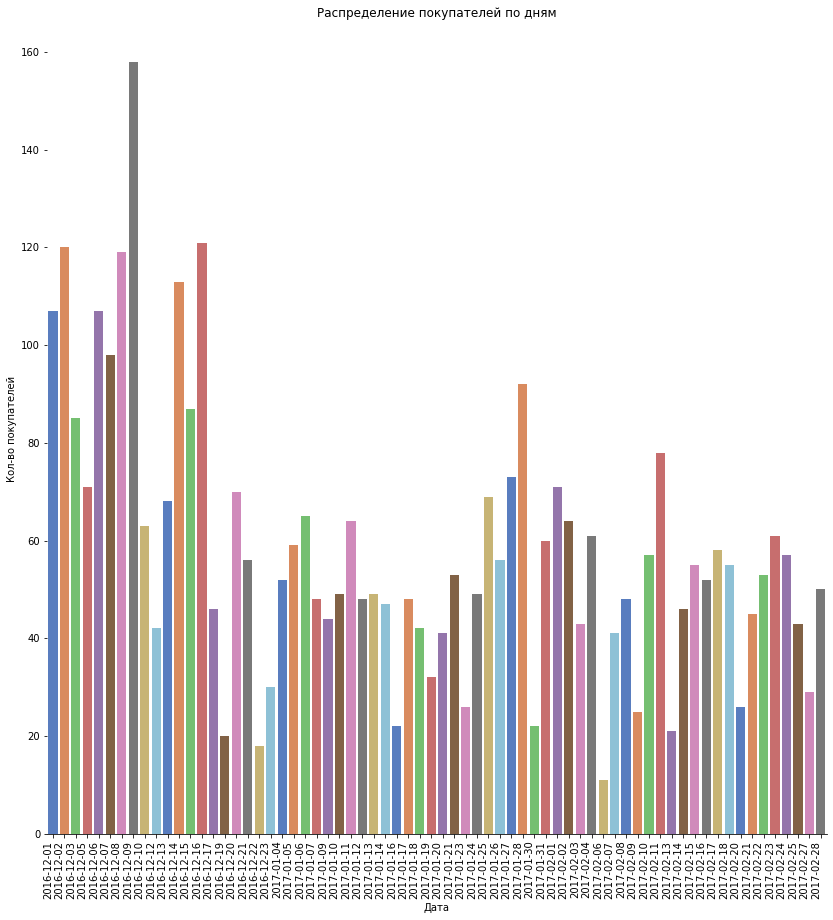

In [25]:
g = sns.catplot(x="purchase_day", y='customerid', data=customer_count_date_0, height=12,
                kind="bar", palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=90,horizontalalignment='right')
g.set(title='Распределение покупателей по дням')
g.set(xlabel='Дата', ylabel='Кол-во покупателей');


Данных слишком много, поэтому далее в основном будем смотреть на распределение по месяцам

In [26]:
customer_count_month_0 = data_shop_0.groupby(['shopid','purchase_month']).agg({'customerid':'nunique','purchaseid':'nunique'}).reset_index()

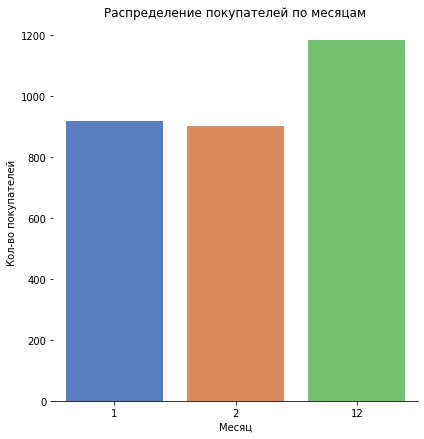

In [27]:
g = sns.catplot(x="purchase_month", y='customerid', data=customer_count_month_0,
                 height=6,kind="bar", palette="muted")
g.despine(left=True)
g.set(title='Распределение покупателей по месяцам')
g.set(xlabel='Месяц', ylabel='Кол-во покупателей');

В декабре 2016г. количество покупателей было больше, нежели чем в январе и феврале. 

In [28]:
# Рассмотрим другие магазины
customer_count_month_other = data_shop_other.groupby(['shopid','purchase_month']).agg({'customerid':'nunique','purchaseid':'nunique'}).reset_index()

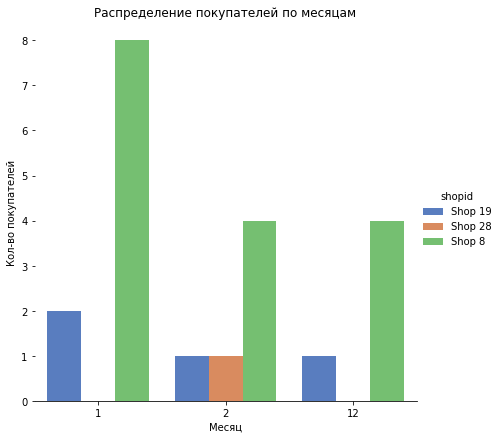

In [29]:
g = sns.catplot(x="purchase_month", y='customerid', data=customer_count_month_other, height=6,
                hue='shopid', kind="bar", palette="muted")
g.despine(left=True)
g.set(title='Распределение покупателей по месяцам')
g.set(xlabel='Месяц', ylabel='Кол-во покупателей');

In [30]:
customer_count_date_other = data_shop_other.groupby(['shopid','purchase_day']).agg({'customerid':'nunique'}).reset_index()

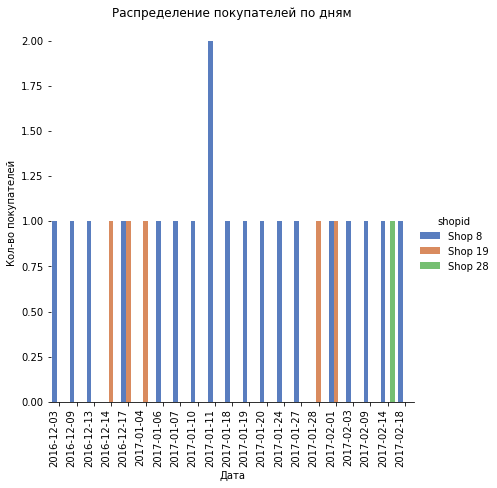

In [31]:
g = sns.catplot(x="purchase_day", y='customerid', data=customer_count_date_other.sort_values('purchase_day'), height=6,
                hue='shopid',kind="bar", palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=90,horizontalalignment='right')
g.set(title='Распределение покупателей по дням')
g.set(xlabel='Дата', ylabel='Кол-во покупателей');

#### Вывод
Мы посмотрели на распределение количества уникальных пользователей  по дням в магазинах 0 и  19,28 и 8. С учетом небольшого количества пользователей в магазинах 19,28 и 8, мы не сможем проверить наши сформированные гипотезы. В дальнейшей работе мы будем рассматривать магазины 19,28 и 8 опционно, а основное внимание направим на магазин 0. 

Также из графиков можем сделать предположение, что магазин №28 был открыт только в феврале

##### <a id="step32"> Шаг 3.2. Диаграмма соотношение количества покупок по различным магазинам по месяцам/дням</a>

##### Для магазина 0

In [32]:
customer_purchaseid_shop_0 = (data_shop_0.loc[data_shop_0['quantity']>=0].groupby(['shopid','purchase_month'])
                         .agg({'purchaseid':'nunique'}).reset_index())

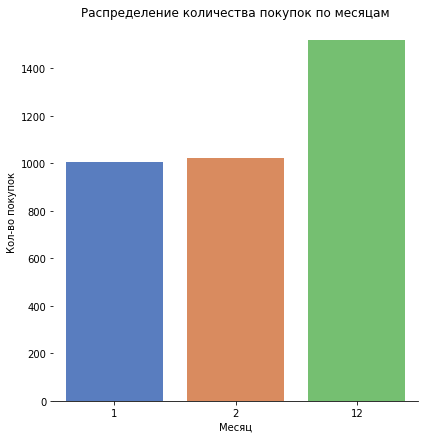

In [33]:
g = sns.catplot(x="purchase_month", y='purchaseid', data=customer_purchaseid_shop_0, height=6,
                kind="bar", palette="muted")
g.despine(left=True)
g.set(title='Распределение количества покупок по месяцам')
g.set(xlabel='Месяц', ylabel='Кол-во покупок');

In [34]:
customer_purchaseid_shop_0_date = (data_shop_0.loc[data_shop_0['quantity']>=0].groupby(['shopid','purchase_day'])
                         .agg({'purchaseid':'nunique'}).reset_index())

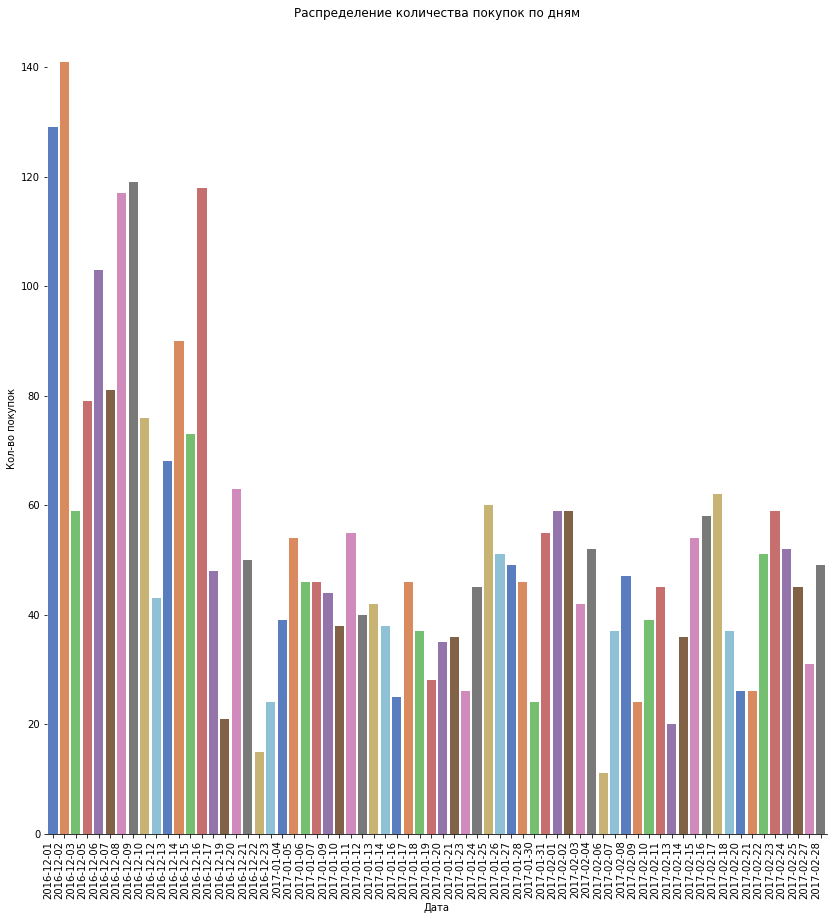

In [35]:
g = sns.catplot(x="purchase_day", y='purchaseid', data=customer_purchaseid_shop_0_date, height=12,
                kind="bar", palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=90,horizontalalignment='right')
g.set(title='Распределение количества покупок по дням')
g.set(xlabel='Дата', ylabel='Кол-во покупок');

##### Для магазинов 8, 19 и  28 

In [36]:
customer_purchaseid_other = (data_shop_other.loc[data_shop_other['quantity']>=0].groupby(['shopid','purchase_month'])
                         .agg({'purchaseid':'nunique'}).reset_index())

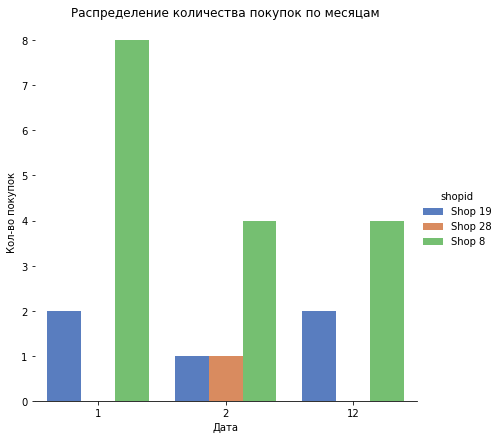

In [37]:
g = sns.catplot(x="purchase_month", y='purchaseid', data=customer_purchaseid_other, height=6,
                hue='shopid',kind="bar", palette="muted")
g.despine(left=True)
g.set(title='Распределение количества покупок по месяцам')
g.set(xlabel='Дата', ylabel='Кол-во покупок');

#### Посмотрим на возврат

In [38]:
return_purchaseid_shop_0 = (data_shop_0.loc[data_shop_0['quantity']<0].groupby(['shopid','purchase_month'])
                         .agg({'purchaseid':'nunique'}).reset_index())

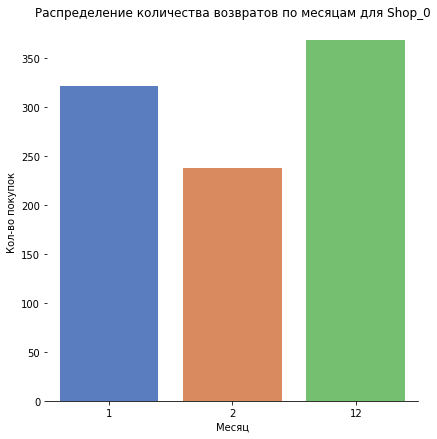

In [39]:
# На данном шаге исключать возвраты мы не будем
g = sns.catplot(x="purchase_month", y='purchaseid', data=return_purchaseid_shop_0, height=6,
                kind="bar", palette="muted")
g.despine(left=True)
g.set(title='Распределение количества возвратов по месяцам для Shop_0')
g.set(xlabel='Месяц', ylabel='Кол-во покупок');

In [40]:
return_purchaseid_other=(data_shop_other.loc[data_shop_other['quantity']<0].groupby(['shopid','purchase_month'])
                         .agg({'purchaseid':'nunique'}).reset_index())

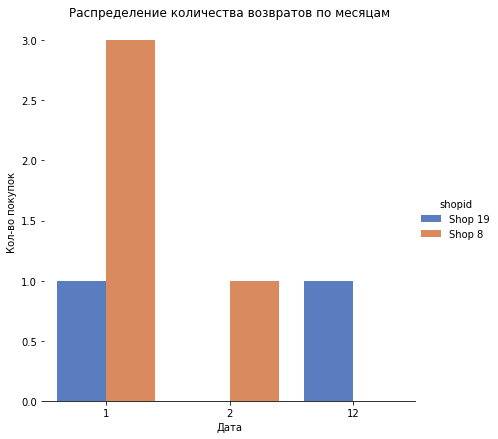

In [41]:
g = sns.catplot(x="purchase_month", y='purchaseid', data=return_purchaseid_other, height=6,
                hue='shopid',kind="bar", palette="muted")
g.despine(left=True)
g.set(title='Распределение количества возвратов по месяцам')
g.set(xlabel='Дата', ylabel='Кол-во покупок');

#### Вывод
Видим, что в график распределения чеков(покупок) отличается от графика распределения клиентов. Все из-за того, что некоторые пользователи в день совершали несколько покупок. 



##### <a id="step33"> Шаг 3.3. Распределение количества товаров по магазинам</a>

In [42]:
item_group = data.groupby('shopid').agg({'item_id':'nunique'}).reset_index()

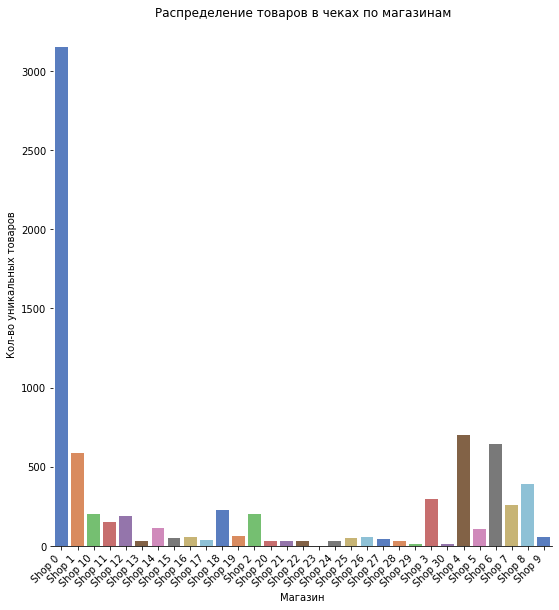

In [43]:
g = sns.catplot(x="shopid", y='item_id', data=item_group, height=8,
                kind="bar", palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=45,horizontalalignment='right')
g.set(title='Распределение товаров в чеках по магазинам')
g.set(xlabel='Магазин', ylabel='Кол-во уникальных товаров');

#### Вывод
По причине, что у нас очень много покупателей в магазине №0,  мы имеем очень много уникальных позиций в чеке(ну конечно же, это еще заслуга магазина). Судить об уникальных товарах мы можем только по чекам клиентов, а в магазине №0 их значительно больше, чем во всех других магазинах.  

##### <a id="step34"> Шаг 3.4. Распределение количества покупок в корзине по магазинам по месяцам</a>

In [44]:
data_shop_month_gr = data.groupby(['purchaseid','purchase_month','shopid']).agg({'quantity':'sum','amount':'sum'}).reset_index()

In [45]:
def plot_box(unit, title_name, xlabel, ylabel):
    shop_list = ['Shop 0','Shop 19','Shop 28','Shop 8']
    for shop in shop_list:
        plt.figure(figsize=(6, 4))
        tmp = \
        data_shop_month_gr[data_shop_month_gr['shopid']==shop].groupby('shopid', as_index=False).agg({unit:'median'})
        sns.boxplot(x='shopid', y= unit, hue ='purchase_month',
                    data=data_shop_month_gr[data_shop_month_gr['shopid']==shop], showfliers=False, order=tmp['shopid'].to_list())
        title = title_name + shop
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()    

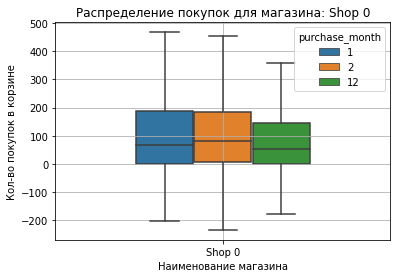

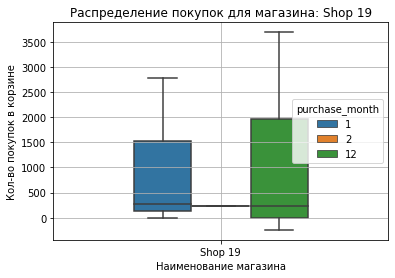

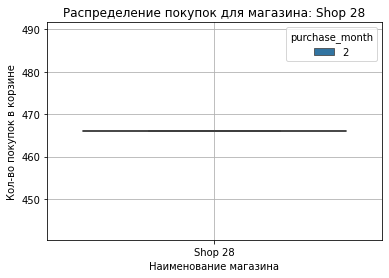

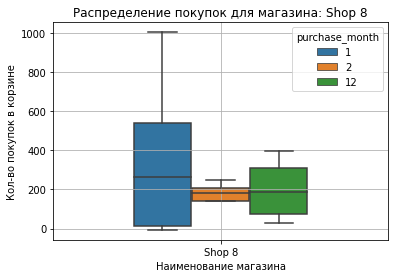

In [46]:
plot_box('quantity','Распределение покупок для магазина: ','Наименование магазина','Кол-во покупок в корзине')

In [47]:
 shop_list = ['Shop 0','Shop 19','Shop 28','Shop 8']
for shop in shop_list:
    display(data_shop_month_gr[data_shop_month_gr['shopid']==shop].describe())

,purchase_month,quantity,amount
count,4470.000000,4470.000000,4470.000000
mean,5.920358,148.140268,351.976771
std,5.206104,1618.370005,2372.994121
min,1.000000,-74216.000000,-77184.640000
25%,1.000000,1.000000,1.320250
50%,2.000000,63.000000,193.755083
75%,12.000000,171.000000,474.618914
max,12.000000,74214.000000,77182.560000


,purchase_month,quantity,amount
count,7.000000,7.000000,7.000000
mean,5.857143,998.000000,1447.419171
std,5.756983,1561.624795,2091.483944
min,1.000000,-241.000000,-739.066667
25%,1.000000,118.000000,304.583250
50%,2.000000,239.000000,707.591317
75%,12.000000,1531.500000,2546.060250
max,12.000000,3689.000000,4462.122548


,purchase_month,quantity,amount
count,1.0,1.0,1.000000
mean,2.0,466.0,1466.012385
std,NaN,NaN,NaN
min,2.0,466.0,1466.012385
25%,2.0,466.0,1466.012385
50%,2.0,466.0,1466.012385
75%,2.0,466.0,1466.012385
max,2.0,466.0,1466.012385


,purchase_month,quantity,amount
count,20.000000,20.000000,20.000000
mean,3.450000,250.500000,808.653633
std,4.406634,263.264026,1194.218392
min,1.000000,-8.000000,-507.531864
25%,1.000000,26.500000,128.218042
50%,1.000000,193.500000,541.574988
75%,2.000000,407.250000,1196.502500
max,12.000000,1004.000000,4939.925333


#### Вывод
Медианное значение количества позиций в корзине в магазине №0 колеблится от 60 до 80. Более массово клиенты покупали в феврале 2017г. Что касается других рассмотренных магазинах (там имеются лояльные клиенты), сложно судить о количестве товаров в чеке, так как мы имеем малое количетсво покупателей. Но все равно стоит отметить, что медианное значение количества товаров в чеке там выше, чем в магазине №0

##### <a id="step35"> Шаг 3.5. Распределение выручки по магазинам по месяцам</a>

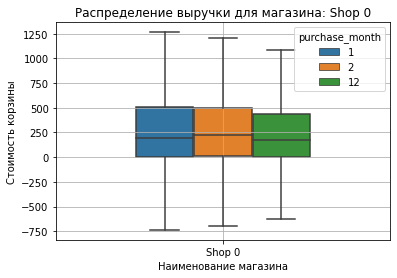

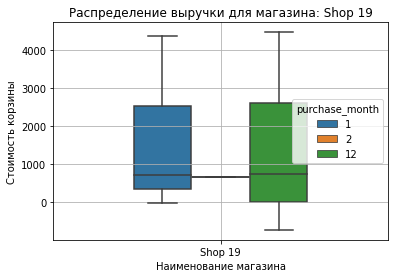

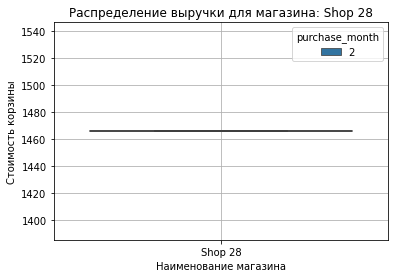

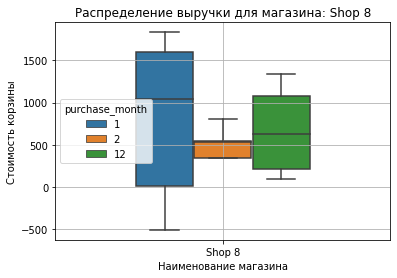

In [48]:
# Посмотрим стоимость одной корзины по месяцам
plot_box('amount','Распределение выручки для магазина: ','Наименование магазина','Стоимость корзины')

In [49]:
# Рассмотрим строчки с отрицательной стоимостью корзины (возврат) 
data_shop_month_gr[data_shop_month_gr['amount']<0].head()

,purchaseid,purchase_month,shopid,quantity,amount
128,536589,12,Shop 0,-11,-43.725000
221,536764,12,Shop 0,-39,-156.624000
343,536996,12,Shop 0,-21,-11.025000
344,536997,12,Shop 0,-21,-10.332000
345,536998,12,Shop 0,-7,-83.766667


In [50]:
# Сгруппируем по магазинам и по месяцу для расчеты выручки
data_amount = data_shop_month_gr.groupby(['shopid','purchase_month']).agg({'amount':'sum'}).reset_index()
# Выберем нужные нам магазины 
data_amount_list = data_amount.query("shopid in @shop_list")

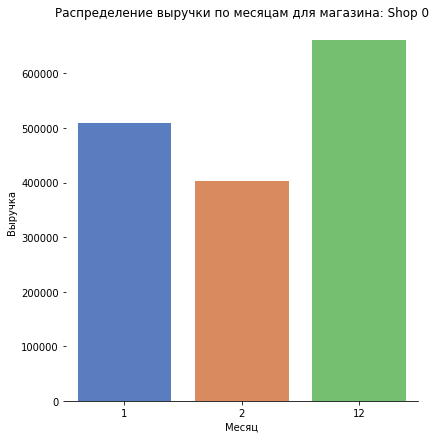

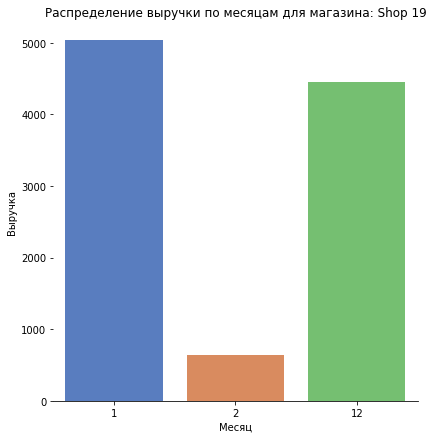

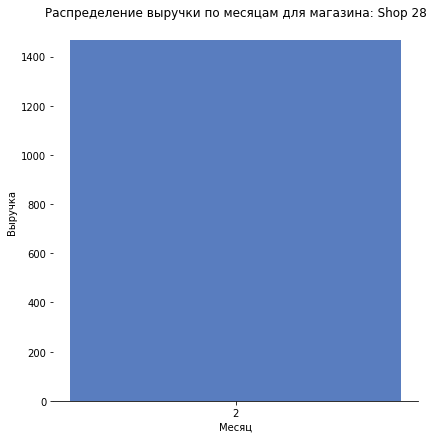

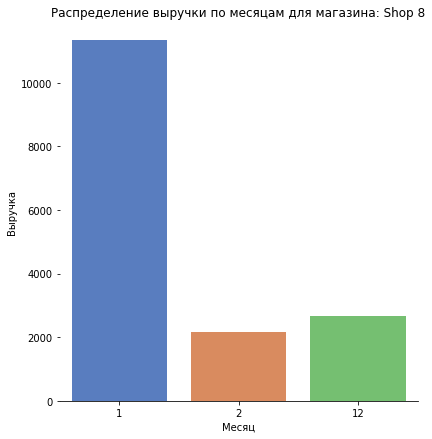

In [51]:
# Построим график выручки по месяцам
for shop in shop_list:
    g = sns.catplot(x="purchase_month", y='amount', data=data_amount[data_amount['shopid'] == shop],
                    height=6, kind="bar", palette="muted")
    g.despine(left=True)
    title_name = 'Распределение выручки по месяцам для магазина: ' + shop
    g.set(title=title_name)
    g.set(xlabel='Месяц', ylabel='Выручка');

#### Вывод
В декабре 2016г. у магазина №0 выручка выше,чем в январе и феврале. Выручка подтверждается графиком распределения количества уникальных покупателей(в декабре пользователей было больше).  

##### <a id="step36"> Шаг 3.6. Отношение количества участников программы лояльности к общему количеству клиентов по магазинам</a>

In [52]:
data_loyalty=data.groupby(['shopid','loyalty_program']).agg({'customerid':'nunique'}).reset_index()
data_loyalty_shop = data_loyalty.query("shopid in @shop_list")

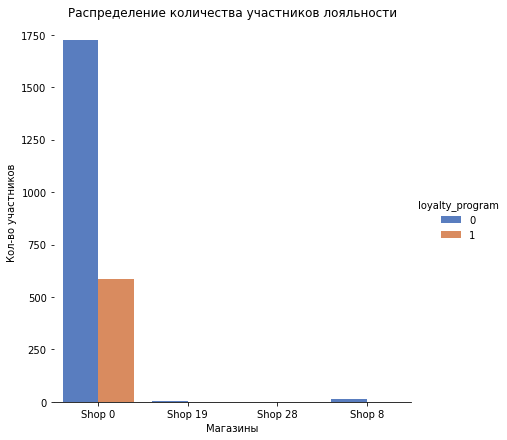

In [53]:
g = sns.catplot(x="shopid", y='customerid', data=data_loyalty_shop,hue='loyalty_program',
                    height=6, kind="bar", palette="muted") 
g.despine(left=True)
title_name = 'Распределение количества участников лояльности'
g.set(title=title_name)
g.set(xlabel='Магазины', ylabel='Кол-во участников');

In [54]:
data_loyalty_pivot = data_loyalty_shop.pivot_table(index='shopid', columns ='loyalty_program',
                                                   values = 'customerid').reset_index()
data_loyalty_pivot.columns=['shopid', 'loyalty_0','loyalty_1']
data_loyalty_pivot= data_loyalty_pivot.fillna(0)
data_loyalty_pivot['fraction']= data_loyalty_pivot['loyalty_1'] / (data_loyalty_pivot['loyalty_1']+data_loyalty_pivot['loyalty_0'])
display(data_loyalty_pivot)

,shopid,loyalty_0,loyalty_1,fraction
0,Shop 0,1723.0,584.0,0.253143
1,Shop 19,2.0,1.0,0.333333
2,Shop 28,0.0,1.0,1.000000
3,Shop 8,11.0,1.0,0.083333


#### Вывод
В магазине №0 25,3% покупателей являются участниками программы лояльности. В других магазинах слишком маленькое количество участников за весь период. 


##### <a id="step37"> Шаг 3.7. Распределение количества товаров лояльных и нелояльных пользователей по месяцам</a>

In [55]:
# Сгруппируем и получим количество товаров в корзине
data_quantity_month=data.groupby(['shopid','purchaseid','loyalty_program','purchase_month']).agg({'quantity':'sum'}).reset_index()
shop_0 = 'Shop 0'
data_quantity_month_shop_0 = data_quantity_month.query("shopid in @shop_0")

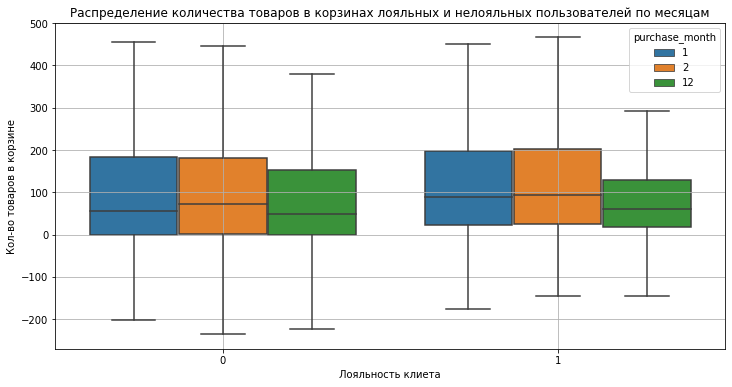

In [56]:
# Построим распределение товаров в корзинах
plt.figure(figsize=(12, 6))
tmp = \
data_quantity_month_shop_0.groupby('loyalty_program', as_index=False).agg({'quantity':'median'})
sns.boxplot(x='loyalty_program', y= 'quantity', hue ='purchase_month',
            data=data_quantity_month_shop_0, showfliers=False, order=tmp['loyalty_program'].to_list())

plt.title('Распределение количества товаров в корзинах лояльных и нелояльных пользователей по месяцам')
plt.xlabel('Лояльность клиета')
plt.ylabel('Кол-во товаров в корзине')
plt.grid(True)
plt.show()   

In [57]:
display(tmp)

,loyalty_program,quantity
0,0,56
1,1,76


#### Вывод
Количество товаров в корзине лояльных пользователей больше, чем у клиентов, которые не участвуют в программе лояльности. Это подтверждает значение медианы

##### <a id="step38"> Шаг 3.8. Распределение выручки лояльных и нелояльных клиентов по месяцам</a>

In [58]:
data_amount_loyalty = data.groupby(['shopid','purchase_month','loyalty_program']).agg({'amount':'sum'}).reset_index()
shop_list = ['Shop 0','Shop 19','Shop 28','Shop 8']
data_amount_list = data_amount_loyalty.query("shopid in @shop_list")

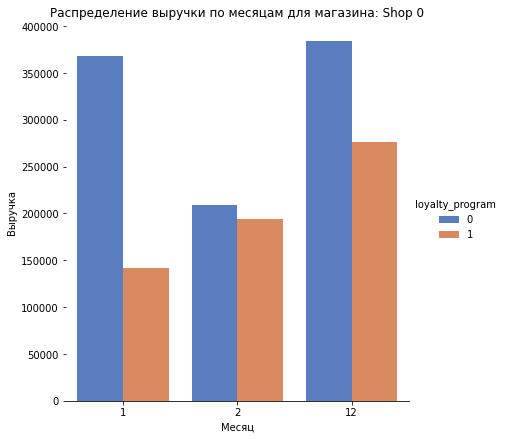

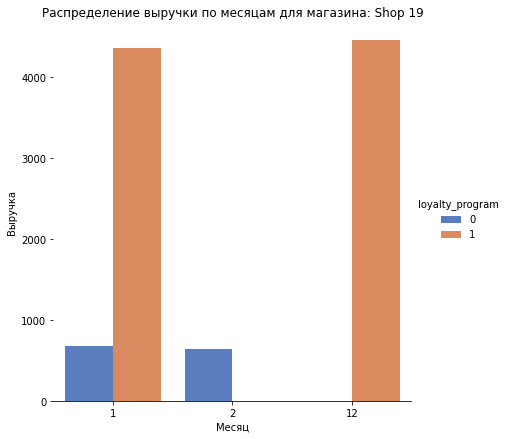

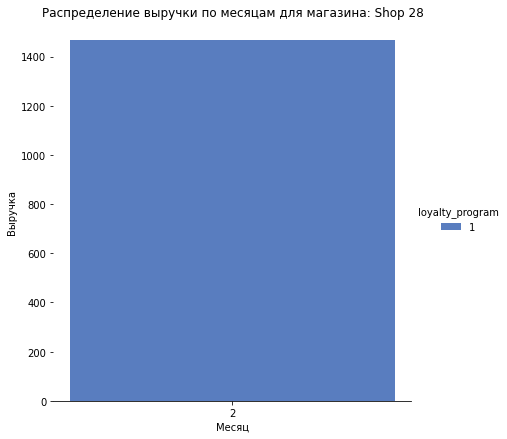

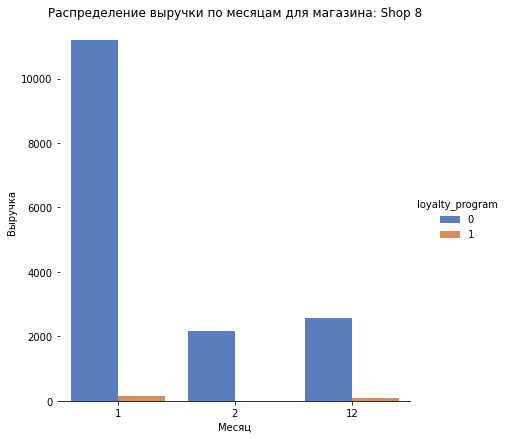

In [59]:
for shop in shop_list:
    g = sns.catplot(x="purchase_month", y='amount', data=data_amount_list[data_amount_list['shopid'] == shop],
                    hue='loyalty_program',height=6, kind="bar", palette="muted")
    g.despine(left=True)
    title_name = 'Распределение выручки по месяцам для магазина: ' + shop
    g.set(title=title_name)
    g.set(xlabel='Месяц', ylabel='Выручка');

In [60]:
# Посчитаем долю выручки лояльных пользователей
data_amount_pivot = data_amount_list.pivot_table(index='shopid', columns ='loyalty_program',
                                                   values = 'amount').reset_index()
data_amount_pivot.columns=['shopid', 'loyalty_0','loyalty_1']
data_amount_pivot= data_amount_pivot.fillna(0)
data_amount_pivot['fraction']= data_amount_pivot['loyalty_1'] / (data_amount_pivot['loyalty_1']+data_amount_pivot['loyalty_0'])
display(data_amount_pivot)

,shopid,loyalty_0,loyalty_1,fraction
0,Shop 0,320593.875610,203851.513030,0.388699
1,Shop 19,658.378909,4407.588190,0.870039
2,Shop 28,0.000000,1466.012385,1.000000
3,Shop 8,5311.152885,119.807000,0.022060


#### Вывод
В Магазине №0  выручка клиентов программы лояльности составляет 38,8% от общей выручки. Поспешных выводов делать не будем, но похоже участники программы лояльности любят тратить деньги. 

##### <a id="step39"> Шаг 3.9. Стандартное отклонение и дисперсия корзины для лояльных и нелояльных клиентов за весь период</a>

In [61]:
shop = 'Shop 0'
shop_0 = data.query("shopid == @shop")
purchase_shop_0 = shop_0.groupby(['purchaseid','loyalty_program']).agg({'amount':'sum'}).reset_index()
shop_0_var = purchase_shop_0.groupby(['loyalty_program'])['amount'].agg('var', ddof=1).reset_index()
shop_0_var['amount'] = shop_0_var['amount'].map('{:,.2f}'.format)
print('Дисперсия')
display(shop_0_var)

shop_0_std = purchase_shop_0.groupby(['loyalty_program'])['amount'].agg('std', ddof=1).reset_index()
print('Стандартное отклонение')
display(shop_0_std)

shop_0_mean = purchase_shop_0.groupby(['loyalty_program'])['amount'].agg('mean').reset_index()
print('Среднее значение')
display(shop_0_mean)

shop_0_median = purchase_shop_0.groupby(['loyalty_program'])['amount'].agg('median').reset_index()
print('Значение медианы')
display(shop_0_median)

Дисперсия


,loyalty_program,amount
0,0,"7,203,818.09"
1,1,"1,932,506.42"


Стандартное отклонение


,loyalty_program,amount
0,0,2683.992937
1,1,1390.146187


Среднее значение


,loyalty_program,amount
0,0,306.984241
1,1,457.408032


Значение медианы


,loyalty_program,amount
0,0,176.087500
1,1,222.455167


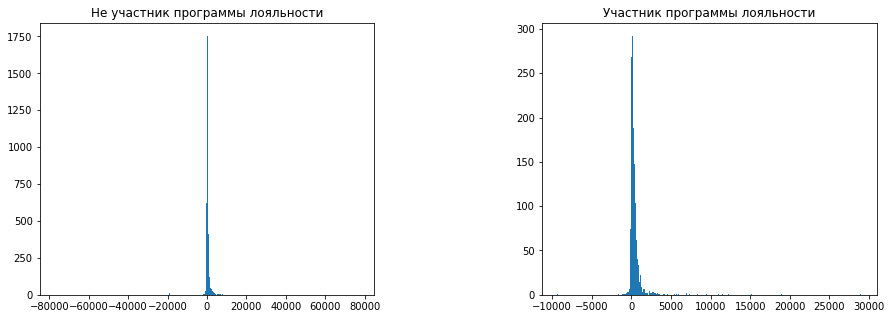

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
ax[0].hist(purchase_shop_0.loc[purchase_shop_0['loyalty_program'] == 0, 'amount'], bins=300)
ax[0].set_title('Не участник программы лояльности')
ax[1].hist(purchase_shop_0.loc[purchase_shop_0['loyalty_program'] == 1, 'amount'], bins=300)
ax[1].set_title('Участник программы лояльности')
plt.show()


#### Вывод
Видим, что наш датасет по двум тарифам скошен вправо(имеет положительную скошенность). 

Это подтверждает и значения медианы и среднего(медиана < среднего)

## <a id="step4"> Шаг 4. Проверка гипотез</a>

In [63]:
# Сгруппируем и получим количество товаров в корзине
data_quantity=data.groupby(['shopid','purchaseid','loyalty_program']).agg({'quantity':'sum'}).reset_index()
shop_0 = 'Shop 0'
data_quantity_shop_0 = data_quantity.query("shopid in @shop_0")

In [64]:
# Сгруппируем и получим выручку пользователей
data_amount=data.groupby(['shopid','customerid','loyalty_program']).agg({'amount':'sum'}).reset_index()
data_amount_shop_0 = data_amount.query("shopid in @shop_0")

##### Отдельно создадим датафрейс с учетом подписки на программу лояльности

In [65]:
# Сгруппируем по магазинам, программе лояльности, клиентам и месяцам 
data_amount_month = data.groupby(['shopid','customerid','loyalty_program','purchase_month']).agg({'amount':'sum'}).reset_index()
data_amount_month_shop_0 = data_amount_month.query("shopid in @shop_0")

In [66]:
# Функция, которая прибавляет 200р за подписку
def loyalty_payment(amount):
    return amount + 200

In [67]:
# К пользователям с программы лояльности применим функцию (они платят по месяцам)
data_amount_month_shop_0.loc[data_amount_month_shop_0['loyalty_program'] == 1,'amount'] = (
    data_amount_month_shop_0.loc[data_amount_month_shop_0['loyalty_program'] == 1,'amount']
    .apply(loyalty_payment))

In [68]:
# Найдем выручку для каждого клиента за весь период 
data_amount_loyalty_shop_0 = (data_amount_month_shop_0.groupby(['customerid','loyalty_program'])
                              .agg({'amount':'sum'}).reset_index())

In [69]:
# Функция для проверки гипотез
def check_hypothesis(df1,df2):
    results = st.ttest_ind(df1,df2)

    alpha = .05 # критический уровень статистической значимости
    print('p-значение: {:,.7f}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

##### <a id="step41"> Гипотеза 1. Среднее количество товаров в корзине у участников программы лояльности и "рядовых" клиентов отличается</a>

Переформулируем гипотезу: Среднее число товаров в корзине у генеральной совокупности по клиентам программы лояльности равно среднему числу товаров генеральной совокупности покупателей, которые в программе лояльности не участвуют

In [70]:
#проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
check_hypothesis(data_quantity_shop_0.loc[data_quantity_shop_0['loyalty_program'] == 0, 'quantity'],
                data_quantity_shop_0.loc[data_quantity_shop_0['loyalty_program'] == 1, 'quantity'])

p-значение: 0.6332693
Не получилось отвергнуть нулевую гипотезу


##### <a id="step42"> Гипотеза 2. Средняя выручка участника программы лояльности и пользователя, который не входит в программу лояльности различаются</a>

Переформулируем гипотезу: Средняя выручка генеральной совокупности клиентов программы лояльности равна средней выручке генеральной совокупности покупателей, которые в программе лояльности не участвуют

In [71]:
check_hypothesis(data_amount_shop_0.loc[data_amount_shop_0['loyalty_program'] == 0, 'amount'], 
    data_amount_shop_0.loc[data_amount_shop_0['loyalty_program'] == 1, 'amount'])


p-значение: 0.0015940
Отвергаем нулевую гипотезу


Проверим на данных с учетом подписки на программу лояльности

In [72]:
check_hypothesis(data_amount_loyalty_shop_0.loc[data_amount_loyalty_shop_0['loyalty_program'] == 0, 'amount'], 
    data_amount_loyalty_shop_0.loc[data_amount_loyalty_shop_0['loyalty_program'] == 1, 'amount'])

p-значение: 0.0000006
Отвергаем нулевую гипотезу


#### Вывод
При проверки гипотезы №1 мы получили значение p-value = 0.63. Это слишком большая вероятность, чтобы делать вывод о различии корзин пользователей программы лояльности и "рядовых" пользователей.

Но при проверки гипотезы №2 мы с точностью можем сказать, что выручка участника программы лояльности и пользователя, который не входит в программу лояльности различается. 


## <a id="step5"> Шаг 5. Общий вывод</a>

В данной работе мы получили датасет с данными о покупках в магазине строительных материалов «Строили, строили и наконец построили». 

Наша задача была: проанализировать систему лояльности. 

Первыми шагами было обработка пропусков, приведения к нуному типу данных и удаление дубликатов. 

Исследовательский анализ данных показал нам, что клиенты программы лояльности имеются только в четырех магазинах. Соответственно почти вся работа была сконцентрирована на них. Правда, сразу же был обнаружен дисбаланс в данных по этим магазинам. Основным магазином для исследования был выбран Shop 0.

Отрицательные значения в поле `Quantity`(количество товаров) мы приняли за возврат товара, что в последующем учли при определении выручки за месяц.

Мы выяснили, что из доля участников программы лояльности в магазине №0 составляет - 25,3% к общему числу пользователей. При этом их корзина имеет большее количество товаров, а также данные пользователи приносят нам больше денег. 

Мы выдвинули 2 гипотезы: 
- Гипотеза 1. Среднее количество товаров в корзине у участников программы лояльности и "рядовых" клиентов отличается 
- Гипотеза 2. Средняя выручка участника программы лояльности и пользователя, который не входит в программу лояльности различаются.

На базе этих гипотез были сформированы нулевые гипотезы. В результате нельзя сказать, что наполняемость корзины как-то зависит от программы лояльности, но мы можем сказать, что выручка у лояльных и нелояльных клиентов различается. 

